### Importing Necessary Dependencies

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.datasets import load_breast_cancer
import tensorflow as tf
tf.random.set_seed(5)
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

### Loading The Dataset

In [180]:
_data = load_breast_cancer()

In [181]:
print(f"Features : {_data.data}")

Features : [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [182]:
print(f"Target : {_data.target}")

Target : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1

In [183]:
print(f"Feature names : {_data.feature_names}")

Feature names : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [184]:
df = pd.DataFrame(_data.data, columns = _data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [185]:
df["target"] = _data.target

In [186]:
df.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
61,8.598,20.98,54.66,221.8,0.12430,0.08963,0.03000,0.009259,0.1828,0.06757,...,27.04,62.06,273.9,0.1639,0.1698,0.09001,0.02778,0.2972,0.07712,1
45,18.650,17.60,123.70,1076.0,0.10990,0.16860,0.19740,0.100900,0.1907,0.06049,...,21.32,150.60,1567.0,0.1679,0.5090,0.73450,0.23780,0.3799,0.09185,0
412,9.397,21.68,59.75,268.8,0.07969,0.06053,0.03735,0.005128,0.1274,0.06724,...,27.99,66.61,301.0,0.1086,0.1887,0.18680,0.02564,0.2376,0.09206,1
242,11.300,18.19,73.93,389.4,0.09592,0.13250,0.15480,0.028540,0.2054,0.07669,...,27.96,87.16,472.9,0.1347,0.4848,0.74360,0.12180,0.3308,0.12970,1
34,16.130,17.88,107.00,807.2,0.10400,0.15590,0.13540,0.077520,0.1998,0.06515,...,27.26,132.70,1261.0,0.1446,0.5804,0.52740,0.18640,0.4270,0.12330,0
417,15.500,21.08,102.90,803.1,0.11200,0.15710,0.15220,0.084810,0.2085,0.06864,...,27.65,157.10,1748.0,0.1517,0.4002,0.42110,0.21340,0.3003,0.10480,0
456,11.630,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.020170,0.1799,0.06166,...,38.81,86.04,527.8,0.1406,0.2031,0.29230,0.06835,0.2884,0.07220,1
30,18.630,25.11,124.80,1088.0,0.10640,0.18870,0.23190,0.124400,0.2183,0.06197,...,34.01,160.50,1670.0,0.1491,0.4257,0.61330,0.18480,0.3444,0.09782,0
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.043750,0.2111,0.08046,...,22.65,65.50,324.7,0.1482,0.4365,1.25200,0.17500,0.4228,0.11750,1
141,16.110,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.059430,0.1861,0.06248,...,25.27,129.00,1233.0,0.1314,0.2236,0.28020,0.12160,0.2792,0.08158,0


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [188]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [189]:
df.shape

(569, 31)

In [190]:
df["target"].value_counts()

1    357
0    212
Name: target, dtype: int64

#### 1 ---> Benign
#### 0 ---> Malignant

In [191]:
df.groupby("target").mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [192]:
x = df.drop(columns="target")
y = df["target"]

In [193]:
print(f"Feature shape : {x.shape}")
print(f"Target shape : {y.shape}")

Feature shape : (569, 30)
Target shape : (569,)


In [194]:
xtrain, xtest, ytrain, ytest= tts(x,y, test_size=0.2, random_state=25)

In [195]:
print(f"xtrain shape : {xtrain.shape}")
print(f"ytrain shape : {ytrain.shape}")
print(f"xtest shape : {xtest.shape}")
print(f"ytest shape : {ytest.shape}")

xtrain shape : (455, 30)
ytrain shape : (455,)
xtest shape : (114, 30)
ytest shape : (114,)


### Standardizing the data

In [196]:
scaler = StandardScaler()
xtrain_std = scaler.fit_transform(xtrain)
xtest_std = scaler.fit_transform(xtest)

### Building the Neural Network

In [197]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(2, activation="sigmoid")
])

In [198]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

### Training the Neural Network

In [199]:
history = model.fit(np.array(xtrain_std), np.array(ytrain), validation_split=0.2, epochs=15)

Epoch 1/15
12/12 [==============================] - 1s 18ms/step - loss: 1.1760 - accuracy: 0.5714 - val_loss: 0.9271 - val_accuracy: 0.6044
Epoch 2/15
12/12 [==============================] - 0s 4ms/step - loss: 0.8198 - accuracy: 0.6511 - val_loss: 0.6470 - val_accuracy: 0.6703
Epoch 3/15
12/12 [==============================] - 0s 4ms/step - loss: 0.5716 - accuracy: 0.7637 - val_loss: 0.4585 - val_accuracy: 0.8132
Epoch 4/15
12/12 [==============================] - 0s 3ms/step - loss: 0.3858 - accuracy: 0.8984 - val_loss: 0.3463 - val_accuracy: 0.9121
Epoch 5/15
12/12 [==============================] - 0s 3ms/step - loss: 0.2764 - accuracy: 0.9396 - val_loss: 0.2730 - val_accuracy: 0.9231
Epoch 6/15
12/12 [==============================] - 0s 3ms/step - loss: 0.2117 - accuracy: 0.9505 - val_loss: 0.2287 - val_accuracy: 0.9231
Epoch 7/15
12/12 [==============================] - 0s 3ms/step - loss: 0.1739 - accuracy: 0.9478 - val_loss: 0.2009 - val_accuracy: 0.9451
Epoch 8/15
12/12 [=

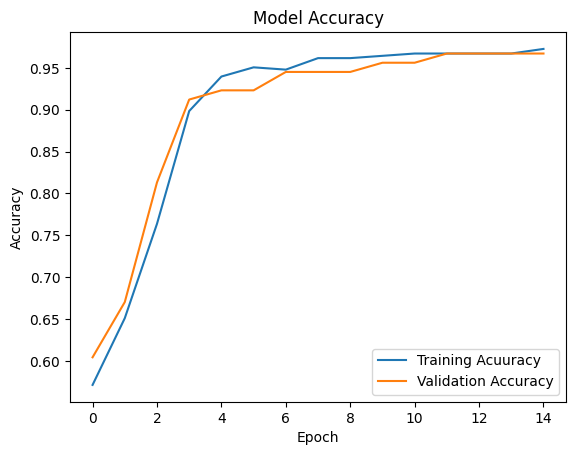

In [200]:
# Visualize the accuracy 
plt.plot(history.history['accuracy'], label='Training Acuuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

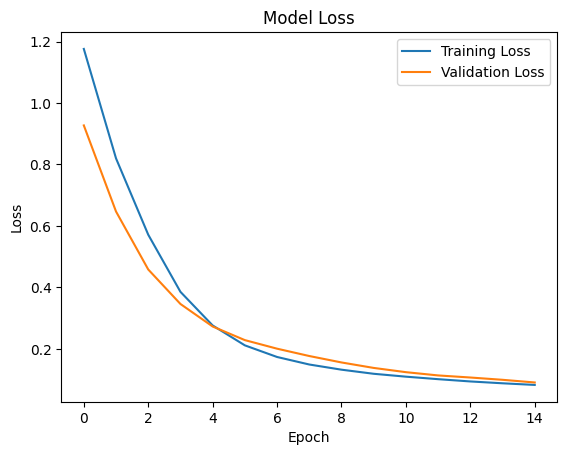

In [201]:
# Visualize the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Model Evaluation Using Test data

In [202]:
loss, accuracy = model.evaluate(np.array(xtest_std), np.array(ytest))
print(f"Model Acuuracy on unseen data : {accuracy}")

4/4 [==============================] - 0s 2ms/step - loss: 0.1377 - accuracy: 0.9561
Model Acuuracy on unseen data : 0.9561403393745422


In [203]:
ypred = model.predict(xtest_std) # gives the prediction probability of each class for that data point

4/4 [==============================] - 0s 1ms/step


In [204]:
print(f"ypred shape : {ypred.shape}")
print(f"First prediction : {ypred[0]}")

ypred shape : (114, 2)
First prediction : [0.01171878 0.965293  ]


In [205]:
# converting the prediction probabilities to class label
ypred_labels = [np.argmax(i) for i in ypred] # np.argmax() returns the index of the maximum value
print(f"First 20 predictions : {ypred_labels[:20]}")

First 20 predictions : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0]


### Building the Predictive System

In [207]:
# Define the input data
input_data = [20.57, 17.77, 132.9, 1326, 0.08474, 0.07864, 0.0869, 0.07017, 0.1812, 0.05667, 0.5435, 0.7339, 3.398, 74.08, 0.005225, 0.01308, 0.0186, 0.0134, 0.01389, 0.003532, 24.99, 23.41, 158.8, 1956, 0.1238, 0.1866, 0.2416, 0.186, 0.275, 0.08902]
# Change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
# Reshape the numpy array to (1, 30)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
# Standardize the input data
input_data_std = scaler.transform(input_data_reshaped)
# Make the prediction
prediction = model.predict(input_data_std)
prediction_label = np.argmax(prediction)
# Print the predicted label
if prediction_label == 0:
    print("Malignant")
else:
    print("Benign")


1/1 [==============================] - 0s 21ms/step
Malignant


c:\Users\Nitro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
